# Importing packages

In [1]:
################################## Data Analysis & Calculation ##################################
import pandas as pd  
import numpy as np  
############# Data Visualization ###############
import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline

#################### Model Building & data partition #####################
import statsmodels.api as sm 
from statsmodels.stats import diagnostic as diag 
from sklearn.model_selection import train_test_split

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Importing Dataset

In [2]:
df=pd.read_csv(r"C:\Users\justw\Downloads\Machine Learning with Python\Linear Regression\Class Assessment\Fish_dataset.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# Q.1 Plot a bar chart showing count of individual species?

In [3]:
count=df['Species'].value_counts()
data=pd.DataFrame(count)
data

,Species
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


Text(0, 0.5, 'count of Species')

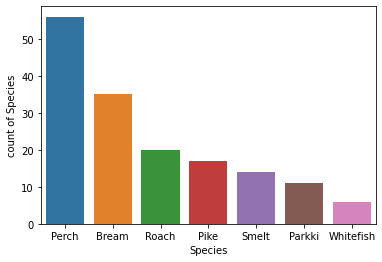

In [4]:
sns.barplot(x=data.index,y=data['Species'])
plt.xlabel('Species')
plt.ylabel('count of Species')

# Q.2 Identify outliers and remove if any?

# Identifying width outlier

<AxesSubplot:ylabel='Weight'>

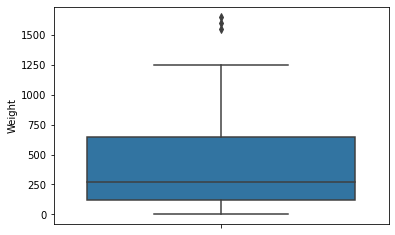

In [5]:
sns.boxplot(y=df['Weight'])

# Winsorizing Technique -- Treatment of Outlier

In [6]:
q1 = df['Weight'].quantile(0.25)
q3 = df['Weight'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr 
upper_limit

1445.0

In [7]:
df['Weight']=np.where(df['Weight'] > upper_limit,upper_limit,df['Weight']) 

# Removing width outlier

<AxesSubplot:ylabel='Weight'>

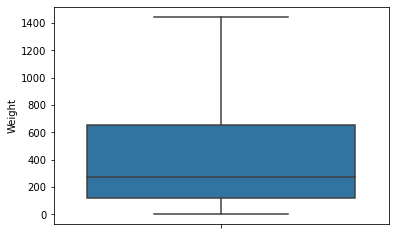

In [8]:
sns.boxplot(y=df['Weight'])

# Identifying Length1 outlier

<AxesSubplot:ylabel='Length1'>

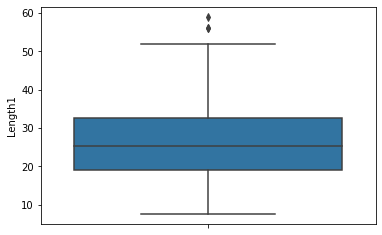

In [9]:
sns.boxplot(y=df['Length1'])

# Winsorizing Technique -- Treatment of Outlier

In [10]:
q1 = df['Length1'].quantile(0.25)
q3 = df['Length1'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr 
upper_limit

53.175000000000004

In [11]:
df['Length1']=np.where(df['Length1'] > upper_limit,upper_limit,df['Length1'])

# Removing Length1 outlier

<AxesSubplot:ylabel='Length1'>

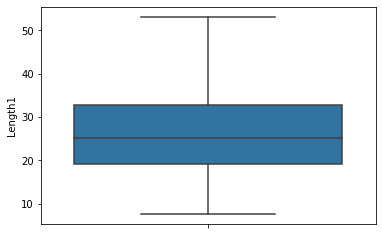

In [12]:
sns.boxplot(y=df['Length1'])

# Identifying  Length2 Outlier

<AxesSubplot:ylabel='Length2'>

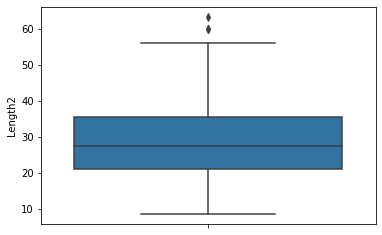

In [13]:
sns.boxplot(y=df['Length2'])

# Winsorizing Technique -- Treatment of Outlier

In [14]:
q1 = df['Length2'].quantile(0.25)
q3 = df['Length2'].quantile(0.75)
iqr = q3-q1
upper_limit = q3+1.5*iqr
upper_limit

57.25

In [15]:
df['Length2']=np.where(df['Length2'] > upper_limit,upper_limit,df['Length2']) 

# Removing Length2 Outlier

<AxesSubplot:ylabel='Length2'>

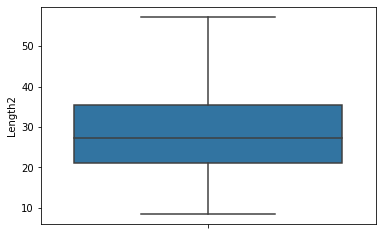

In [16]:
sns.boxplot(y=df['Length2'])

# Identifing Length3 outlier

<AxesSubplot:ylabel='Length3'>

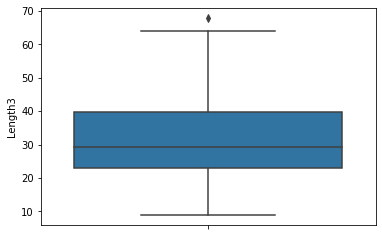

In [17]:
sns.boxplot(y=df['Length3'])

# Winsorizing Technique -- Treatment of Outlier

In [18]:
q1 = df['Length3'].quantile(0.25)
q3 = df['Length3'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr 
upper_limit

64.40000000000002

In [19]:
df['Length3']=np.where(df['Length3'] > upper_limit,upper_limit,df['Length3']) 

# Removing Length3 Outlier

<AxesSubplot:ylabel='Length3'>

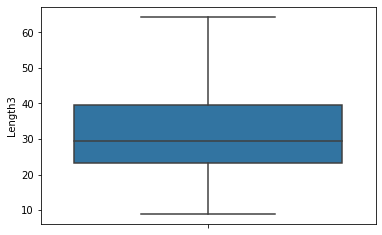

In [20]:
sns.boxplot(y=df['Length3'])

# Identifing Height Outlier

<AxesSubplot:ylabel='Height'>

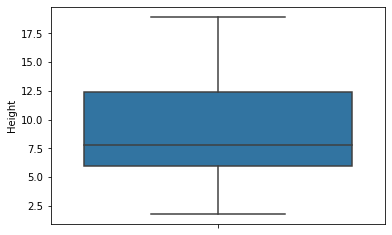

In [21]:
sns.boxplot(y=df['Height'])

# No outlier in Height

# Identifying Width outlier

<AxesSubplot:ylabel='Width'>

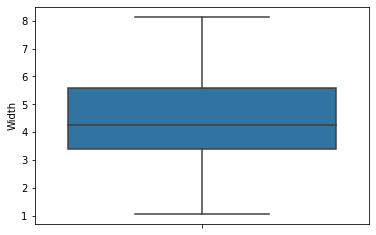

In [22]:
sns.boxplot(y=df['Width'])

# No outlier in width

# Q.3 Build a regression model and print regression equation?

# Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [23]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# In linear regression we use only number data so we deleted Species column

In [24]:
new=df.drop('Species',axis=1)
new

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [25]:
# Putting feature variable to X
X = new.drop('Weight', axis= 1)

# Putting response variable to y
y = new[['Weight']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

In [26]:
fish = pd.concat([y_train, X_train], axis=1)
fish.head()

,Weight,Length1,Length2,Length3,Height,Width
3,363.0,26.3,29.0,33.5,12.7300,4.4555
113,700.0,34.0,36.0,38.3,10.6091,6.7408
85,130.0,19.3,21.3,22.8,6.3840,3.5340
155,13.4,11.7,12.4,13.5,2.4300,1.2690
76,70.0,15.7,17.4,18.5,4.5880,2.9415


# Correlation Matrix

In [27]:
fish.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.908177,0.910381,0.917800,0.725061,0.883249
Length1,0.908177,1.000000,0.999499,0.992873,0.645435,0.870861
Length2,0.910381,0.999499,1.000000,0.994657,0.659073,0.876785
Length3,0.917800,0.992873,0.994657,1.000000,0.708358,0.875092
Height,0.725061,0.645435,0.659073,0.708358,1.000000,0.801379
Width,0.883249,0.870861,0.876785,0.875092,0.801379,1.000000


<AxesSubplot:>

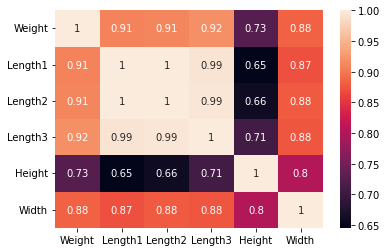

In [28]:
sns.heatmap(fish.corr(),annot = True)

<AxesSubplot:title={'center':'Weight vs Length1'}, xlabel='Length1', ylabel='Weight'>

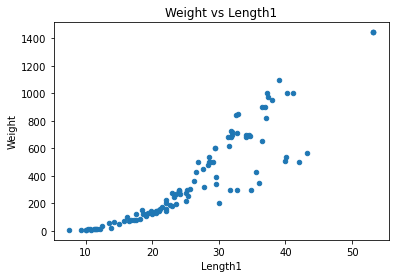

In [29]:
fish.plot.scatter(x='Length1', y='Weight', title='Weight vs Length1')

#### Length1 have 91%  strong positve correlation with Sales

* Length1 have high impact on Weight
* There is no colinearity in data, So every platform is independent 

### Multicolinearity (with the help of VIF)

In [30]:
X1=fish.drop(['Weight'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Length1    11053.803994
Length2    14067.147068
Length3     2213.639114
Height        47.526806
Width         84.824206
dtype: float64

In [31]:
X1=fish.drop(['Weight','Length2'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Length1    1804.065616
Length3    1814.503607
Height       47.268405
Width        75.882909
dtype: float64

In [32]:
X1=fish.drop(['Weight','Length2','Length3'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Length1    30.396138
Height     14.821382
Width      50.914244
dtype: float64

In [33]:
X1=fish.drop(['Weight','Length2','Length3','Width'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Length1    8.599281
Height     8.599281
dtype: float64

* No collinearity in the data 

# Model Building

*  H0 :- There is no Linear relationship between Weight and Length1 and Height

* Vs 

*  H1 :- There is Linear relationship between Weight and Length1 and Height

Alpha = 0.05 (5%)

In [34]:
import statsmodels.formula.api as smf
model = smf.ols('Weight ~ Length1+Height',data=fish).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     325.9
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           1.77e-46
Time:                        18:37:45   Log-Likelihood:                -695.92
No. Observations:                 111   AIC:                             1398.
Df Residuals:                     108   BIC:                             1406.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -459.8684     34.854    -13.194      0.000    -528.956    -390.781
Length1       26.0360      1.639     15.885      0.000      22.787      29.285
Height        19.0743      3.806      5.012      0.000      11.531      26.618
==============================================================================
Omnibus:                        4.074   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                3.524
Skew:                           0.419   Prob(JB):                        0.172
Kurtosis:                       3.241   Cond. No.                         82.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* There is Linear relationship between Weight and Length1 , Height
* 85% is accuracy of model , so we say model is good fit 

# regression equation is

* Y = -459.8684 + 26.0360 * Length1 + 19.0743 * Height

# Q.4 What is the mean score of the model at 95% confidence interval?

In [35]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Length1,Length2,Length3,Height,Width,Weight
18,30.9,33.5,38.6,15.6330,5.1338,610.0
157,13.2,14.3,15.2,2.8728,2.0672,19.7
30,35.0,38.5,44.1,18.0369,6.3063,920.0
69,21.2,23.0,25.8,10.3458,3.6636,200.0
118,36.6,39.0,41.3,12.4313,7.3514,820.0


In [36]:
test['Predicted']=model.predict(test)
test

,Length1,Length2,Length3,Height,Width,Weight,Predicted
18,30.9,33.5,38.6,15.6330,5.1338,610.0,642.830583
157,13.2,14.3,15.2,2.8728,2.0672,19.7,-61.397240
30,35.0,38.5,44.1,18.0369,6.3063,920.0,795.430622
69,21.2,23.0,25.8,10.3458,3.6636,200.0,289.432369
118,36.6,39.0,41.3,12.4313,7.3514,820.0,730.165471
74,13.8,15.0,16.0,3.8240,2.4320,40.0,-27.632229
140,48.3,51.7,55.1,8.9262,6.1712,950.0,967.928966
2,23.9,26.5,31.1,12.3778,4.6961,340.0,398.488351
66,19.0,20.7,23.2,8.5376,3.2944,140.0,197.663185
92,20.5,22.5,24.0,6.7920,3.6240,150.0,203.421088


In [37]:
test['Error']=fish.Weight-test.Predicted
test['Square_Error']=(test.Error)*(test.Error)
test

,Length1,Length2,Length3,Height,Width,Weight,Predicted,Error,Square_Error
18,30.9,33.5,38.6,15.6330,5.1338,610.0,642.830583,NaN,NaN
157,13.2,14.3,15.2,2.8728,2.0672,19.7,-61.397240,NaN,NaN
30,35.0,38.5,44.1,18.0369,6.3063,920.0,795.430622,NaN,NaN
69,21.2,23.0,25.8,10.3458,3.6636,200.0,289.432369,NaN,NaN
118,36.6,39.0,41.3,12.4313,7.3514,820.0,730.165471,NaN,NaN
74,13.8,15.0,16.0,3.8240,2.4320,40.0,-27.632229,NaN,NaN
140,48.3,51.7,55.1,8.9262,6.1712,950.0,967.928966,NaN,NaN
2,23.9,26.5,31.1,12.3778,4.6961,340.0,398.488351,NaN,NaN
66,19.0,20.7,23.2,8.5376,3.2944,140.0,197.663185,NaN,NaN
92,20.5,22.5,24.0,6.7920,3.6240,150.0,203.421088,NaN,NaN


In [39]:
import math
from sklearn.metrics import mean_squared_error 
# calculate the mean squared error
model_mse = mean_squared_error(fish['Weight'],fish['fitted_value'])
# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)

print("RMSE {:.3}".format(model_rmse)) #21

KeyError: 'fitted_value'

In [40]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(test['Weight'],test['Predicted'])
# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("RMSE {:.3}".format(model_rmse)) #9

RMSE 1.14e+02


# Q.5 Compare real and predicted weights and give a conclusion statement based on it?


In [41]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,Length1,Length2,Length3,Height,Width,Weight
18,30.9,33.5,38.6,15.6330,5.1338,610.0
157,13.2,14.3,15.2,2.8728,2.0672,19.7
30,35.0,38.5,44.1,18.0369,6.3063,920.0
69,21.2,23.0,25.8,10.3458,3.6636,200.0
118,36.6,39.0,41.3,12.4313,7.3514,820.0


In [42]:
df_test['Prediction']=model.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,Length1,Length2,Length3,Height,Width,Weight,Prediction
18,30.9,33.5,38.6,15.6330,5.1338,610.0,642.830583
157,13.2,14.3,15.2,2.8728,2.0672,19.7,-61.397240
30,35.0,38.5,44.1,18.0369,6.3063,920.0,795.430622
69,21.2,23.0,25.8,10.3458,3.6636,200.0,289.432369
118,36.6,39.0,41.3,12.4313,7.3514,820.0,730.165471


In [43]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.Weight, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.9


In [44]:
fish['fitted_value']=model.fittedvalues #Predicted Value
fish['residual']=model.resid  #Error
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [45]:
from sklearn.metrics import r2_score
r2 = r2_score(fish.Weight, fish.fitted_value)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.86
